### XGBOOST

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from xgboost import XGBRegressor


In [2]:
df=pd.read_csv('/content/sample_data/preprocessed_earthquake_data.csv')

In [3]:
target='Magnitude'
categorical_col=['Type','Magnitude Type','Source','Status']
numerical_col=df.drop(columns=[target]+categorical_col).columns.tolist()

In [4]:
X=df.drop(columns=[target])
y=df[target]

In [5]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [6]:
numerical_transformer=StandardScaler()

categorical_transformer=OneHotEncoder(handle_unknown='ignore')

preprocessor =ColumnTransformer(
    transformers=[
        ('num',numerical_transformer,numerical_col),
        ('cat',categorical_transformer,categorical_col)
    ]
)

model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor ),
    ('regressor',XGBRegressor(random_state=42,use_label_encoder=False,eval_metric='rmse'))
])

In [7]:
model_pipeline.fit(X_train,y_train)

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [05:11:24] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Latitude', 'Longitude',
                                                   'Depth', 'Root Mean Square',
                                                   'Year', 'Day', 'Month_sin',
                                                   'Month_cos', 'Hour_sin',
                                                   'Hour_cos', 'Type_Explosion',
                                                   'Type_Nuclear Explosion',
                                                   'Type_Rock Burst',
                                                   'Magnitude Type_MD',
                                                   'Magnitude Type_MH',
                                                   'Magnitude Type_ML',
                                                   'Magnitude Type_MS',
                                                   'Magnitude Type_MW',
                                                   '...
                              feature_types=None, feature_weights=None,
                              gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=None,
                              num_parallel_tree=None, ...))])

In [8]:
y_pred=model_pipeline.predict(X_test)

In [9]:
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)

In [10]:
print(f'Mean Absolute Error:{mae:.4f}')
print(f'Mean Squared Error:{mse:.4f}')
print(f'R2 score:{r2:.4f}')

Mean Absolute Error:0.8076
Mean Squared Error:1.1782
R2 score:-0.0828


In [13]:
encoded_cat_features=model_pipeline.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(categorical_col)
all_features=numerical_col+list(encoded_cat_features)


In [14]:
feature_importances=model_pipeline.named_steps['regressor'].feature_importances_
indices=np.argsort(feature_importances)[::-1]

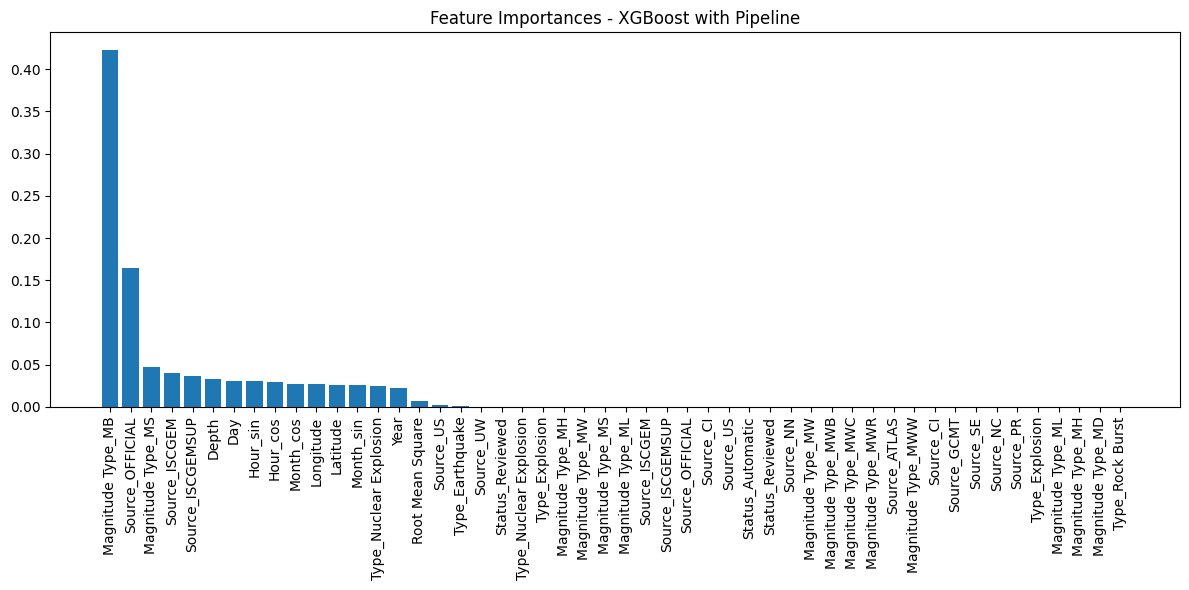

In [15]:
plt.figure(figsize=(12, 6))
plt.title('Feature Importances - XGBoost with Pipeline')
plt.bar(range(len(all_features)), feature_importances[indices], align='center')
plt.xticks(range(len(all_features)), np.array(all_features)[indices], rotation=90)
plt.tight_layout()
plt.show()